<a href="https://colab.research.google.com/github/Retured/YouTube/blob/main/optimization/Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.0670


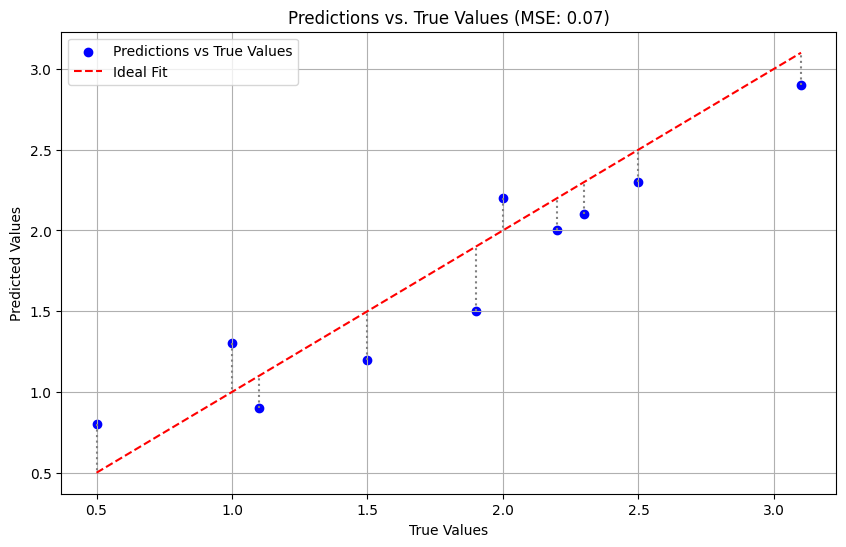

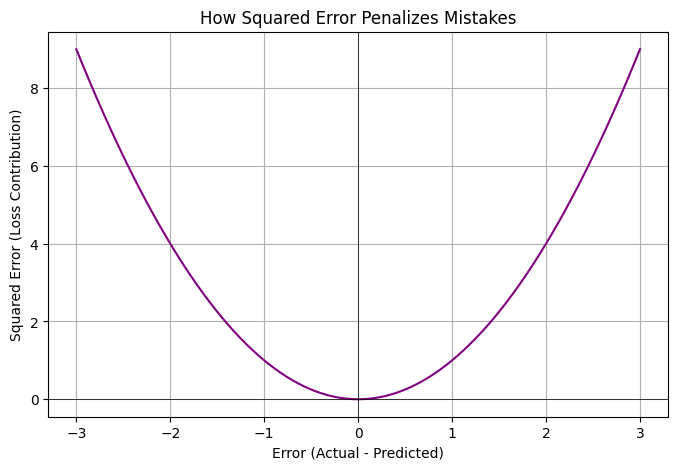

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# True values and predicted values (example)
y_true = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
y_pred = np.array([2.3, 0.8, 2.0, 1.5, 2.9, 2.1, 2.2, 1.3, 1.2, 0.9])

# Calculate MSE
mse = np.mean((y_true - y_pred)**2)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the errors
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predictions vs True Values')
plt.plot([min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())],
         [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())],
         color='red', linestyle='--', label='Ideal Fit')

for i in range(len(y_true)):
    plt.plot([y_true[i], y_true[i]], [y_pred[i], y_true[i]], linestyle=':', color='gray') # Vertical distance (error)
    # For squared error visualization, one could plot squares, but it gets cluttered.
    # The distance line itself represents the error term (y_true - y_pred) that gets squared.

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Predictions vs. True Values (MSE: {mse:.2f})")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the quadratic nature of squared error
errors = np.linspace(-3, 3, 100)
squared_errors = errors**2

plt.figure(figsize=(8, 5))
plt.plot(errors, squared_errors, color='purple')
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Squared Error (Loss Contribution)")
plt.title("How Squared Error Penalizes Mistakes")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

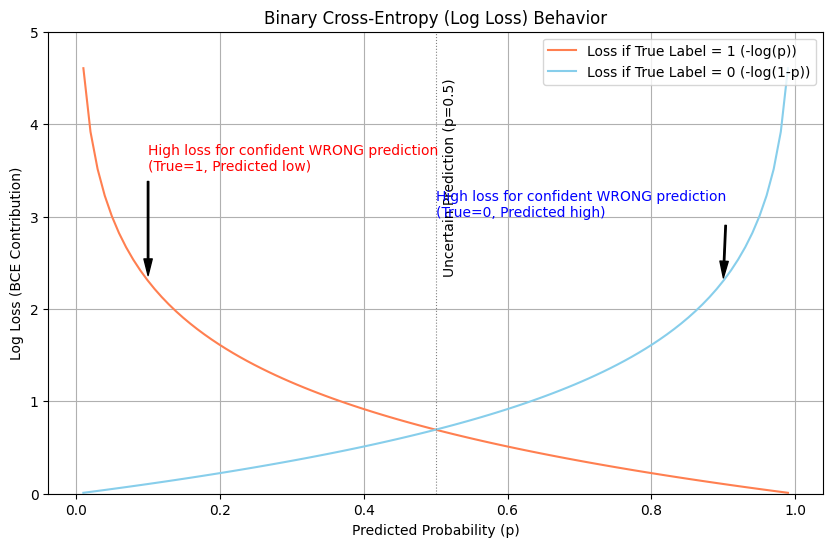


Example BCE:
True=1, Pred=0.9, BCE Loss: 0.1054
True=1, Pred=0.1, BCE Loss: 2.3026
True=0, Pred=0.1, BCE Loss: 0.1054
True=0, Pred=0.9, BCE Loss: 2.3026


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities
p = np.linspace(0.01, 0.99, 100) # Probabilities from near 0 to near 1

# Calculate Log Loss if true label is 1
loss_if_true_1 = -np.log(p)
# Calculate Log Loss if true label is 0
loss_if_true_0 = -np.log(1 - p)

plt.figure(figsize=(10, 6))
plt.plot(p, loss_if_true_1, color='coral', label='Loss if True Label = 1 (-log(p))')
plt.plot(p, loss_if_true_0, color='skyblue', label='Loss if True Label = 0 (-log(1-p))')

plt.xlabel("Predicted Probability (p)")
plt.ylabel("Log Loss (BCE Contribution)")
plt.title("Binary Cross-Entropy (Log Loss) Behavior")
plt.legend()
plt.grid(True)
plt.ylim(0, 5) # Limit y-axis for better visualization
plt.axvline(0.5, color='gray', linestyle=':', linewidth=0.8)
plt.text(0.51, 4.5, 'Uncertain Prediction (p=0.5)', rotation=90, va='top')
plt.annotate('High loss for confident WRONG prediction\n(True=1, Predicted low)', xy=(0.1, -np.log(0.1)), xytext=(0.1, 3.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), color='red')
plt.annotate('High loss for confident WRONG prediction\n(True=0, Predicted high)', xy=(0.9, -np.log(1-0.9)), xytext=(0.5, 3.0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), color='blue')
plt.show()

# Simple BCE calculation example
def binary_cross_entropy(y_true_scalar, y_pred_scalar):
    # Clip y_pred_scalar to avoid log(0)
    epsilon = 1e-15
    y_pred_scalar = np.clip(y_pred_scalar, epsilon, 1 - epsilon)
    return -(y_true_scalar * np.log(y_pred_scalar) + (1 - y_true_scalar) * np.log(1 - y_pred_scalar))

print(f"\nExample BCE:")
# Case 1: True = 1, Predicted = 0.9 (Good confident prediction)
print(f"True=1, Pred=0.9, BCE Loss: {binary_cross_entropy(1, 0.9):.4f}")
# Case 2: True = 1, Predicted = 0.1 (Bad confident prediction)
print(f"True=1, Pred=0.1, BCE Loss: {binary_cross_entropy(1, 0.1):.4f}")
# Case 3: True = 0, Predicted = 0.1 (Good confident prediction)
print(f"True=0, Pred=0.1, BCE Loss: {binary_cross_entropy(0, 0.1):.4f}")
# Case 4: True = 0, Predicted = 0.9 (Bad confident prediction)
print(f"True=0, Pred=0.9, BCE Loss: {binary_cross_entropy(0, 0.9):.4f}")